In [44]:
import os
import pandas as pd
import re

#with open("dataset_tree_times_table.txt", "w") as file:
    #pass

In [45]:
list_names = ['adult', 'breast+cancer+wisconsin+diagnostic', 'car_evaluation', 'mushroom', 'nursery', 'seismic', 'spambase', 'wine', 'banknote+authentication', 'chess+king+rook+vs+king+pawn', 'monk1', 'monk2', 'monk3']

alias_dict = {
    'adult' : 'adult',
    'breast+cancer+wisconsin+diagnostic' : 'bcwd',
    'car_evaluation' : 'car_eval',
    'mushroom' : 'mushroom',
    'nursery' : 'nursery',
    'seismic' : 'seismic',
    'spambase' : 'spambase',
    'wine' : 'wine',
    'banknote+authentication' : 'banknote',
    'chess+king+rook+vs+king+pawn' : 'chess',
    'monk1' : 'monk1',
    'monk2' : 'monk2',
    'monk3' : 'monk3'
}

clean_dict = {
    'adult' : 'adult',
    'breast+cancer+wisconsin+diagnostic' : 'breast cancer wisconsin diagnostic',
    'car_evaluation' : 'car evalualtion',
    'mushroom' : 'mushroom',
    'nursery' : 'nursery',
    'seismic' : 'seismic',
    'spambase' : 'spambase',
    'wine' : 'wine',
    'banknote+authentication' : 'banknote',
    'chess+king+rook+vs+king+pawn' : 'king rook vs. king pawn',
    'monk1' : 'monk1',
    'monk2' : 'monk2',
    'monk3' : 'monk3'
}



# Create empty DataFrame with row indices as the names
df = pd.DataFrame(index=list_names)

# Add the three columns initialized with None
df['sklearn_time'] = None
df['orig_rollOCT_time'] = None
df['refac_rollOCT_time'] = None

print(df)


print(df)



                                   sklearn_time orig_rollOCT_time  \
adult                                      None              None   
breast+cancer+wisconsin+diagnostic         None              None   
car_evaluation                             None              None   
mushroom                                   None              None   
nursery                                    None              None   
seismic                                    None              None   
spambase                                   None              None   
wine                                       None              None   
banknote+authentication                    None              None   
chess+king+rook+vs+king+pawn               None              None   
monk1                                      None              None   
monk2                                      None              None   
monk3                                      None              None   

                                 

In [46]:
# orig_RollOCT

for name in list_names:
    sum_times = 0
    for i in range(10): #folds
        with open(f'../results/{name}/pulp/fold{i+1}/fold{i+1}_acc_times_{name}.txt', 'r') as file:
            last_line = file.readlines()[-1]
            match = re.search(r'\d+\.\d+', last_line)  # Finds the first floating-point number
            if match:
                seconds = float(match.group())
                sum_times += seconds
    mean = sum_times/10
    df.at[name, 'orig_rollOCT_time'] = round(mean, 3)
    #minutes= round(mean/60, 2)
    #df.at[name, 'orig_rollOCT_time'] = minutes


print(df)
            

                                   sklearn_time orig_rollOCT_time  \
adult                                      None          1427.873   
breast+cancer+wisconsin+diagnostic         None            23.927   
car_evaluation                             None             7.062   
mushroom                                   None            63.858   
nursery                                    None            49.953   
seismic                                    None            22.106   
spambase                                   None             72.53   
wine                                       None              2.58   
banknote+authentication                    None             5.965   
chess+king+rook+vs+king+pawn               None            15.803   
monk1                                      None             1.744   
monk2                                      None             2.901   
monk3                                      None              2.35   

                                 

In [47]:
#sklearn

for name in list_names:
    sum_times = 0
    for i in range(10): #folds
        with open(f'../results/{name}/cart/fold{i+1}/fold{i+1}_times_{name}.txt', 'r') as file:
            last_line = file.readlines()[-1]
            match = re.search(r'\d+\.\d+', last_line)  # Finds the first floating-point number
            if match:
                seconds = float(match.group())
                sum_times += seconds
    mean = sum_times/10
    df.at[name, 'sklearn_time'] = round(mean, 3)
    #minutes= round(mean/60, 2)
    #df.at[name, 'orig_rollOCT_time'] = minutes


print(df)

                                   sklearn_time orig_rollOCT_time  \
adult                                     0.144          1427.873   
breast+cancer+wisconsin+diagnostic        0.006            23.927   
car_evaluation                            0.005             7.062   
mushroom                                  0.018            63.858   
nursery                                   0.013            49.953   
seismic                                   0.007            22.106   
spambase                                   0.01             72.53   
wine                                      0.004              2.58   
banknote+authentication                   0.004             5.965   
chess+king+rook+vs+king+pawn              0.006            15.803   
monk1                                     0.005             1.744   
monk2                                     0.004             2.901   
monk3                                     0.004              2.35   

                                 

In [48]:
#refac_RollOCT

for name in list_names:
    sum_times = 0
    for i in range(10): #folds
        with open(f'../results/{name}_refactored_tree_pulp/fold{i+1}/fold{i+1}_time_{name}.txt', 'r') as file:
            last_line = file.readlines()[-1]
            match = re.search(r'\d+\.\d+', last_line)  # Finds the first floating-point number
            if match:
                seconds = float(match.group())
                sum_times += seconds
    mean = sum_times/10
    df.at[name, 'refac_rollOCT_time'] = round(mean, 3)
    #minutes= round(mean/60, 2)
    #df.at[name, 'orig_rollOCT_time'] = minutes

print(df)

                                   sklearn_time orig_rollOCT_time  \
adult                                     0.144          1427.873   
breast+cancer+wisconsin+diagnostic        0.006            23.927   
car_evaluation                            0.005             7.062   
mushroom                                  0.018            63.858   
nursery                                   0.013            49.953   
seismic                                   0.007            22.106   
spambase                                   0.01             72.53   
wine                                      0.004              2.58   
banknote+authentication                   0.004             5.965   
chess+king+rook+vs+king+pawn              0.006            15.803   
monk1                                     0.005             1.744   
monk2                                     0.004             2.901   
monk3                                     0.004              2.35   

                                 

In [49]:
#df['speedup_factor'] = df['old_time'] / df['new_time']

df['speedup_factor'] = df['orig_rollOCT_time'] / df['refac_rollOCT_time']
df['speedup_factor'] = df['speedup_factor'].astype(float)
df['speedup_factor'] = df['speedup_factor'].round(3)

print(df)


                                   sklearn_time orig_rollOCT_time  \
adult                                     0.144          1427.873   
breast+cancer+wisconsin+diagnostic        0.006            23.927   
car_evaluation                            0.005             7.062   
mushroom                                  0.018            63.858   
nursery                                   0.013            49.953   
seismic                                   0.007            22.106   
spambase                                   0.01             72.53   
wine                                      0.004              2.58   
banknote+authentication                   0.004             5.965   
chess+king+rook+vs+king+pawn              0.006            15.803   
monk1                                     0.005             1.744   
monk2                                     0.004             2.901   
monk3                                     0.004              2.35   

                                 

In [50]:
#df.to_csv('data_easy_times.txt', sep='&', index=True)

In [51]:

print(df['refac_rollOCT_time'].sum())

1437.7500000000005


In [52]:
alias_dict = {
    'adult' : 'adult',
    'breast+cancer+wisconsin+diagnostic' : 'bcwd',
    'car_evaluation' : 'car_eval',
    'mushroom' : 'mushroom',
    'nursery' : 'nursery',
    'seismic' : 'seismic',
    'spambase' : 'spambase',
    'wine' : 'wine',
    'banknote+authentication' : 'banknote',
    'chess+king+rook+vs+king+pawn' : 'chess',
    'monk1' : 'monk1',
    'monk2' : 'monk2',
    'monk3' : 'monk3'
}

In [53]:
df_2 = df.copy()

df_2 = df.drop(['speedup_factor'], axis=1)

# Reset index to turn row labels (datasets) into a column
df_2 = df_2.reset_index().rename(columns={'index': 'dataset'})


# Melt wide-format df to long-format for seaborn
df_long = df_2.melt(id_vars='dataset', var_name='method', value_name='runtime')

df_long['dataset'] = df_long['dataset'].map(alias_dict)


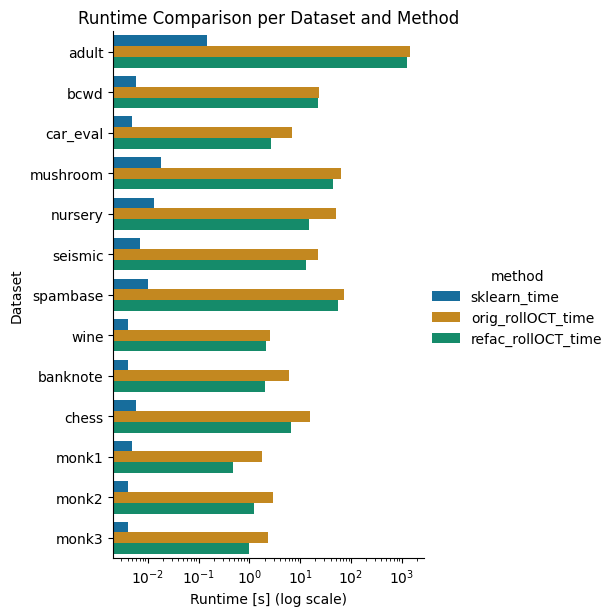

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_long has columns: dataset, method, runtime (long format)
sns.catplot(
    data=df_long,
    y='dataset',         # dataset on y-axis (each tick is one dataset)
    x='runtime',         # runtime on x-axis (numeric)
    hue='method',        # separate colors per method
    kind='bar',          # you can also try kind='point' or 'bar'
    height=6,
    aspect=0.8,
    palette='colorblind'
)
plt.xticks([])  # This removes all x-axis ticks and labels

#plt.legend(title="Method and feature subset size", loc='upper center', bbox_to_anchor=(0.5, 1.29), ncol=4, frameon=True)
plt.xscale('log')  #Optional: use log scale for runtime axis to manage different time scales
plt.ylabel('Dataset')
plt.xlabel('Runtime [s] (log scale)')
plt.title('Runtime Comparison per Dataset and Method')
#plt.savefig(os.path.join('../results', f'times.svg'), format='svg', bbox_inches='tight')
plt.show()

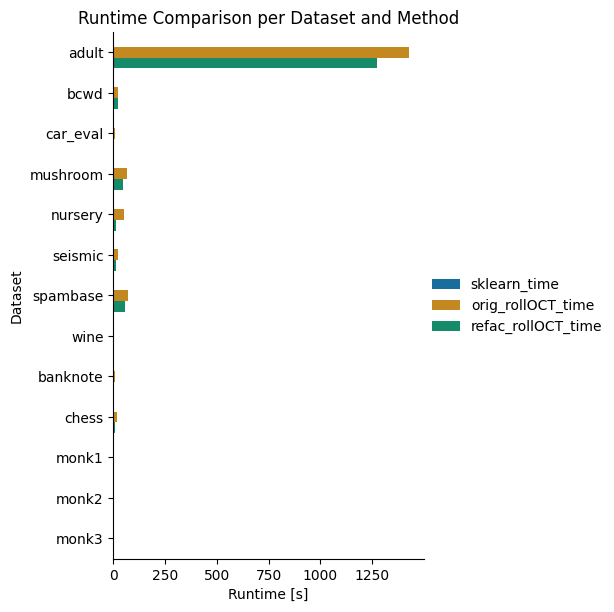

In [ ]:
g = sns.catplot(
    data=df_long,
    y='dataset',
    x='runtime',
    hue='method',
    kind='bar',
    height=6,
    aspect=0.8,
    palette='colorblind'
)
g.set(xscale='log')
g._legend.set_title('')  # remove legend title
plt.ylabel('Dataset')
plt.xlabel('Runtime [s] (log scale)')
plt.title('Runtime Comparison per Dataset and Method')
plt.savefig(os.path.join('../results', f'times_log.svg'), format='svg', bbox_inches='tight')
plt.show()
